In [18]:
# RANDOM FOREST CLASSIFIER

# Import all the packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from itertools import chain
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Import the cleaned data set

from google.colab import files
files.upload()

Saving Cleaned_Dataset.csv to Cleaned_Dataset.csv


In [3]:
# Load the cleaned data set

df = pd.read_csv('Cleaned_Dataset.csv')
df = df[['target', 'tweet']]

df.head()

,target,tweet
0,0,aw bummer get david car third day it good
1,0,upset update facebok texting it cry result sch...
2,0,dive many time ball manage save rest go bound
3,0,whole body feel itchy like fire
4,0,no behave all mad here see there


In [4]:
df['body_len'] = df['tweet'].apply(lambda x: len(x) - x.count(" "))
df.head()

,target,tweet,body_len
0,0,aw bummer get david car third day it good,33
1,0,upset update facebok texting it cry result sch...,55
2,0,dive many time ball manage save rest go bound,37
3,0,whole body feel itchy like fire,26
4,0,no behave all mad here see there,26


In [5]:

df.shape

(1593253, 3)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593253 entries, 0 to 1593252
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1593253 non-null  int64 
 1   tweet     1593253 non-null  object
 2   body_len  1593253 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 36.5+ MB


In [16]:
# check the number of positive vs. negative tagged sentences
positives = df['target'][df.target == 1 ]
negatives = df['target'][df.target == 0 ]

print('Total length of the data is:         {}'.format(df.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         1593253
No. of positve tagged sentences is:  796317
No. of negative tagged sentences is: 796936


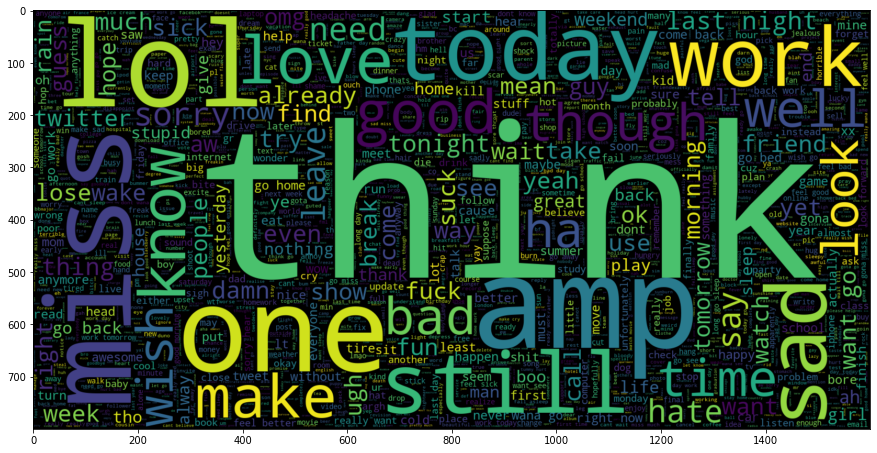

In [17]:
# generating word cloud for negative words


from wordcloud import WordCloud

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 0].tweet))
plt.imshow(wc , interpolation = 'bilinear')

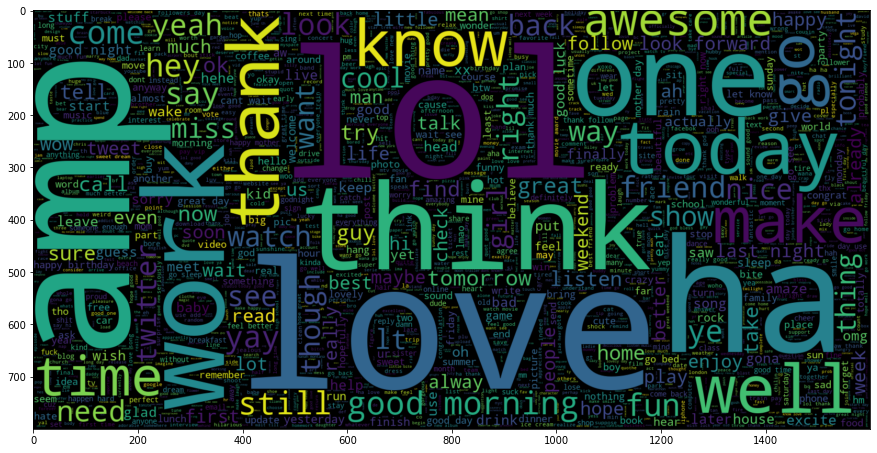

In [19]:
# generating word cloud for positive words

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 1].tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [20]:

# get a word count per of text

def word_count(words):
    return len(words.split())

In [ ]:
# plot word count distribution for both positive and negative 

df['word count'] = df['tweet'].apply(word_count)
p = df['word count'][df.target == 1]
n = df['word count'][df.target == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [6]:
# Splitting the training and test data sets

X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['target'], test_size=0.25, random_state=42)

In [7]:
# Feature extraction

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1, 3))
vectorizer.fit(X_train)      
x_tr = vectorizer.transform(X_train)
x_te = vectorizer.transform(X_test)

print(f'Vector fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

Vector fitted.
No. of feature_words:  117214


In [13]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(x_te)

    # Print the evaluation metrics for the dataset.
    print("Performance Report: ")
    print("---------------------")
    print(classification_report(y_test, y_pred))
    print('\n\n')

    print("Confusion Matrix: ")
    print("---------------------")
    cf_matrix = confusion_matrix(y_test, y_pred)
    print('conf',cf_matrix)

    print('\n\n')

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()
    plt.savefig('confusionMatrix')

Performance Report: 
---------------------
              precision    recall  f1-score   support

           0       0.75      0.67      0.71    198669
           1       0.70      0.77      0.74    199645

    accuracy                           0.72    398314
   macro avg       0.72      0.72      0.72    398314
weighted avg       0.72      0.72      0.72    398314




Confusion Matrix: 
---------------------
conf [[133088  65581]
 [ 44980 154665]]





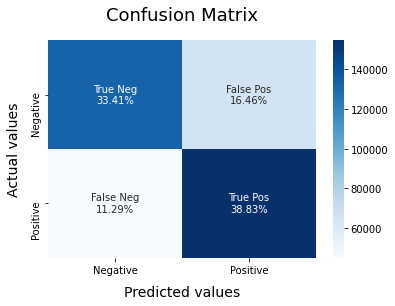

<Figure size 432x288 with 0 Axes>

In [14]:
# Evaluate the model

rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50,random_state=42)
rf.fit(x_tr, y_train)
model_Evaluate(rf)